# Import required libraries

In [237]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from haversine import haversine, Unit

# Read in data

In [238]:
data = pd.read_excel('ANZ_synthesised_transaction_dataset.xlsx')
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


The data above is a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

# Looking at the columns

In [239]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [240]:
pd.DataFrame({'Columns': data.columns})

,Columns
0,status
1,card_present_flag
2,bpay_biller_code
3,account
4,currency
5,long_lat
6,txn_description
7,merchant_id
8,merchant_code
9,first_name


# Checking the number of rows and columns in the dataset

In [241]:
print('Data Shape: ', data.shape)

Data Shape:  (12043, 23)


so we have 12,043 rows and 23 columns

# Basic Checks

Task 
* Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?
* Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?
* Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

* Checking if there are 100 unique customers in the data

In [242]:
print("Number of unique customer ID's:", data.customer_id.nunique())

Number of unique customer ID's: 100


* Checking if each row corresponds to a unique transaction ID

In [243]:
print("Number of rows in dataset: ", len(data))
print("Number of unique transaction ID's: ", data.transaction_id.nunique())

Number of rows in dataset:  12043
Number of unique transaction ID's:  12043


number of rows corresponds to the number of unique transaction ID's 

* Checking if we have 3 months worth of data

In [244]:
data.date.describe(datetime_is_numeric=True)

count                            12043
mean     2018-09-15 21:27:39.951839232
min                2018-08-01 00:00:00
25%                2018-08-24 00:00:00
50%                2018-09-16 00:00:00
75%                2018-10-09 00:00:00
max                2018-10-31 00:00:00
Name: date, dtype: object

we do indeed have 3 months worth of data as shown in min (2018-08-01) and max (2018-10-31) i.e from 1/8/2018 to 31/10/2018.


In [245]:
data.date.describe()

/tmp/ipykernel_13875/3984613233.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.date.describe()


count                   12043
unique                     91
top       2018-09-28 00:00:00
freq                      174
first     2018-08-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

There are 92 days in this time period
August = 31 days
Sepetember = 30 days
October = 31 days
31 + 30 + 31 = 92
However, there are only 91 uniques days in this data which suggests that one day is missing.

* finding the missing day

In [246]:
pd.date_range(start= '2018-08-01', end= '2018-10-31').difference(data.date)

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)

Data on the 16th of august 2018 is missing.

# Gathering information about the data types and percentage of missing values 

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [248]:
def missing_values():
    missing = data.isnull().sum()
    missing = missing[missing > 0]
    missing_percentage = round(missing / len(data), 3) * 100
    return pd.DataFrame({'Number of missing values': missing, 'Percentage': missing_percentage}).sort_values(by = 'Percentage', ascending = False)
missing_values()

,Number of missing values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


Both bpay_biller_code and merchant_code have a severe amount of missing values

# Descriptive statistics

In [249]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


# Exploratory data analysis (EDA)

# 1. Categorical variables

The following columns will be skipped because they don't provide much information
* bpay_biller_code
* account
* merchant_id
* first_name
* transaction_id
* customer_id

## I. Status

In [250]:
data.status.value_counts(dropna= False)

authorized    7717
posted        4326
Name: status, dtype: int64

Status of the individual transactions
* Authorized - meaning transaction has been approved
* Posted - meaning transaction still being processed

## II. Card present flag

In [251]:
data.card_present_flag.value_counts(dropna= False)

1.0    6194
NaN    4326
0.0    1523
Name: card_present_flag, dtype: int64

[Card-not-present(CNP)](https://en.wikipedia.org/wiki/Card_not_present_transaction#:~:text=A%20card%2Dnot%2Dpresent%20transaction,is%20given%20and%20payment%20effected.) transaction occurs when neither the cardholder nor the credit card is physically present at the time of transaction. It is mostly coomon for orders that happen remotely over the phone, internet or email

## III. Currency of transaction

In [252]:
data.currency.value_counts(dropna = False)

AUD    12043
Name: currency, dtype: int64

All transactions are made in AUD. Can potentially drop this column because unnecessary since it does not provide us with any additional information. 

## IV. Longitude and latitude

In [253]:
data.long_lat.head()

0    153.41 -27.95
1    153.41 -27.95
2    151.23 -33.94
3    153.10 -27.66
4    153.41 -27.95
Name: long_lat, dtype: object

These are the coordinates where the transactions were made. 

## V. Transaction description (types of transactions)

In [254]:
data.txn_description.value_counts(dropna = False)

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

/home/ayodeji/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by category')

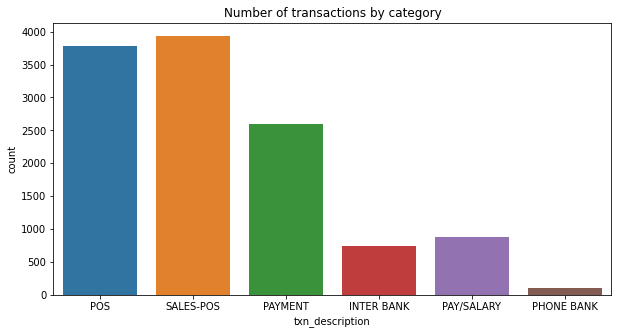

In [255]:
plt.figure(figsize = (10, 5))
sns.countplot(data.txn_description)
plt.title("Number of transactions by category")

These are the descriptions for each transaction. Transactions mostly consist of sales payment. 

Also, this might explain the missing values in the merchant columns as not all transactions are purchases of goods and services from merchants. We can validate this later. 

In [256]:
data[["txn_description", "amount"]].groupby("txn_description", as_index = False).mean().sort_values(by = "amount", ascending = False)

,txn_description,amount
1,PAY/SALARY,1898.728029
3,PHONE BANK,106.099010
0,INTER BANK,86.699461
2,PAYMENT,77.613077
4,POS,40.407412
5,SALES-POS,39.909789


Text(0.5, 1.0, 'Average transaction volume by category')

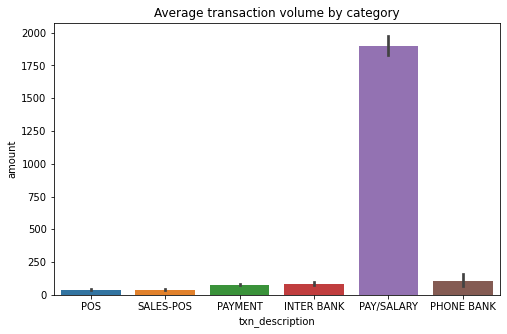

In [257]:
plt.figure(figsize = (8, 5))
sns.barplot(x = "txn_description", y = "amount", data = data)
plt.title("Average transaction volume by category")

Pay/salary has the largest average transaction volume. Seems logical. 

## VI. Gender

In [258]:
data.gender.value_counts(dropna = False)

M    6285
F    5758
Name: gender, dtype: int64

/home/ayodeji/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by gender')

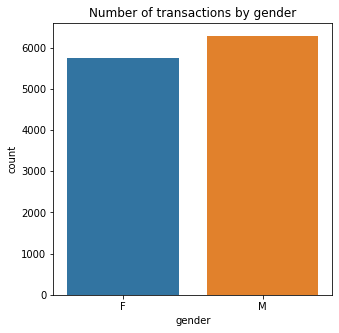

In [259]:
plt.figure(figsize = (5, 5))
sns.countplot(data.gender)
plt.title("Number of transactions by gender")

There are slightly more male customer transactions than female customer transactions. 

In [260]:
data[["gender", "amount"]].groupby("gender", as_index = False).mean().sort_values(by = "amount", ascending = False)

,gender,amount
1,M,205.721809
0,F,168.517303


Text(0.5, 1.0, 'Average transaction volume by gender')

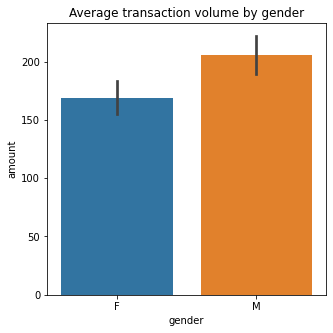

In [261]:
plt.figure(figsize = (5, 5))
sns.barplot(x = "gender", y = "amount", data = data)
plt.title("Average transaction volume by gender")

Male also has a higher average transaction volume. 

## VII. Merchant suburb

In [262]:
data.merchant_suburb.value_counts(dropna = False)

NaN                  4326
Melbourne             255
Sydney                233
Southport              82
Brisbane City          79
                     ... 
Cowell                  1
Tweed Heads South       1
Ballandean              1
Sydenham                1
Kings Park              1
Name: merchant_suburb, Length: 1610, dtype: int64

These are the suburbs where the transactions were made. 

## VIII. Merchant state

In [263]:
data.merchant_state.value_counts(dropna = False)

NaN    4326
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

/home/ayodeji/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by state')

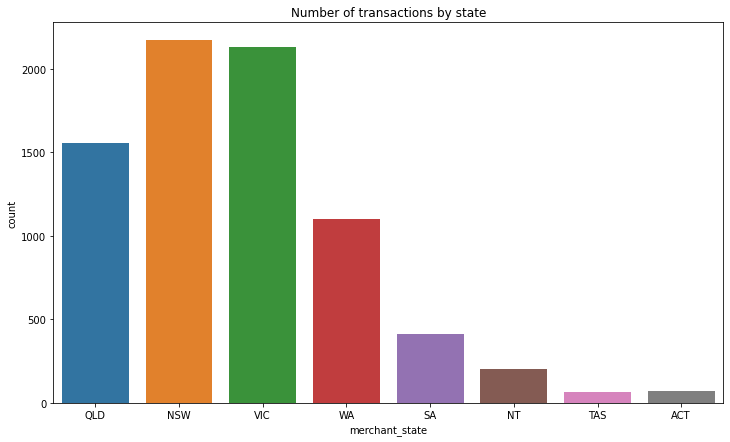

In [264]:
plt.figure(figsize = (12, 7))
sns.countplot(data.merchant_state)
plt.title("Number of transactions by state")

Similar to merchant suburb, these are the states where the transactions were made.

NSW and VIC are the top 2 states in number of transactions. 

In [265]:
data[["merchant_state", "amount"]].groupby("merchant_state", as_index = False).mean().sort_values(by = "amount", ascending = False)

,merchant_state,amount
0,ACT,66.803836
1,NSW,47.036316
2,NT,44.726293
6,VIC,41.099953
4,SA,40.425470
3,QLD,34.372397
7,WA,30.901873
5,TAS,28.866618


Text(0.5, 1.0, 'Average transaction volume by state')

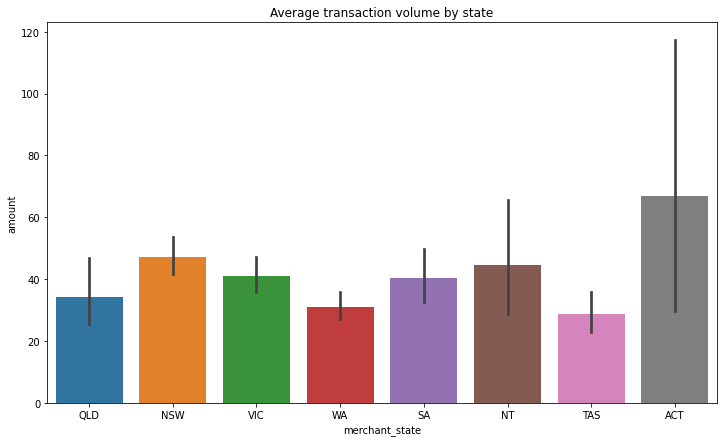

In [266]:
plt.figure(figsize = (12, 7))
sns.barplot(x = "merchant_state", y = "amount", data = data)
plt.title("Average transaction volume by state")

ACT has the highest average transaction volume but the variance is quite large. 

## IX. Extraction

In [267]:
data.extraction.head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

This appears to be the timestamp for each transaction. We can cross-reference this with the date column.

In [268]:
data[["date", "extraction"]].head()

,date,extraction
0,2018-08-01,2018-08-01T01:01:15.000+0000
1,2018-08-01,2018-08-01T01:13:45.000+0000
2,2018-08-01,2018-08-01T01:26:15.000+0000
3,2018-08-01,2018-08-01T01:38:45.000+0000
4,2018-08-01,2018-08-01T01:51:15.000+0000


Since we already have an existing date column, we can potentially extract only the time component out of the extraction column. 

## X. Country

In [269]:
data.country.value_counts(dropna = False)

Australia    12043
Name: country, dtype: int64

All transactions were recorded within Australia. Therefore, can consider dropping this column since it does not provide us with any information.

## XI. Merchant longitude and latitude

In [270]:
data.merchant_long_lat.head()

0    153.38 -27.99
1    151.21 -33.87
2    151.21 -33.87
3    153.05 -26.68
4    153.44 -28.06
Name: merchant_long_lat, dtype: object

These are the coordinates of the merchants' location.

## XII. Movement (debit/credit)

In [271]:
data.movement.value_counts(dropna = False)

debit     11160
credit      883
Name: movement, dtype: int64

/home/ayodeji/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by movement')

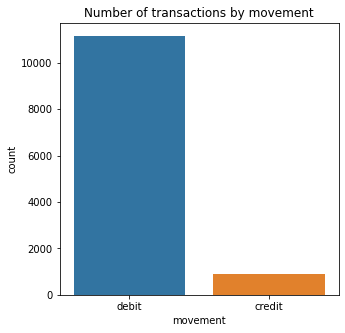

In [272]:
plt.figure(figsize = (5 ,5))
sns.countplot(data.movement)
plt.title("Number of transactions by movement")

Most transactions are overwhelmingly debit transactions. 

Text(0.5, 1.0, 'Average transaction volume by movement')

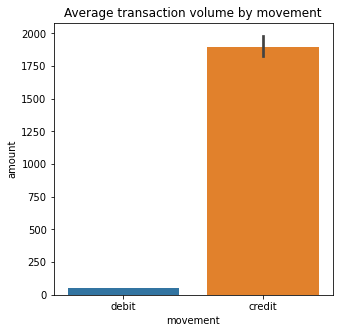

In [273]:
plt.figure(figsize = (5, 5))
sns.barplot(x = "movement", y = "amount", data = data)
plt.title("Average transaction volume by movement")

However, the average transaction amount for credit transactions are much higher.

# 2. Numerical variables

## I. Balance

/home/ayodeji/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Balance distribution')

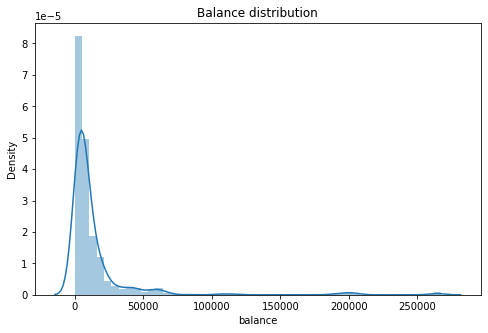

In [274]:
plt.figure(figsize = (8, 5))
sns.distplot(data.balance)
plt.title("Balance distribution")

/home/ayodeji/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

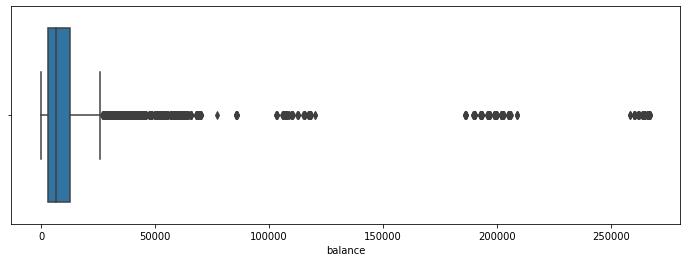

In [275]:
plt.figure(figsize = (12, 4))
sns.boxplot(data.balance)


















Distribution of the balance feature has a long tail. 

## II. Age of customers

/home/ayodeji/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution')

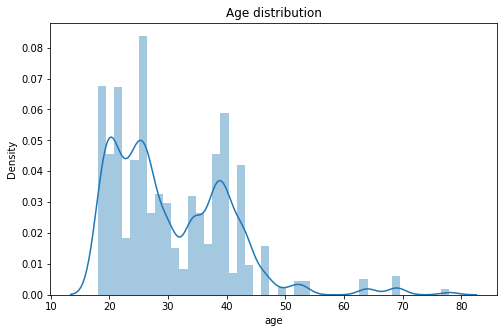

In [276]:
plt.figure(figsize = (8, 5))
sns.distplot(data.age)
plt.title("Age distribution")


Majority of the customers belong in the 20-25 age bracket. 

## III. Transaction amount

/home/ayodeji/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Amount distribution')

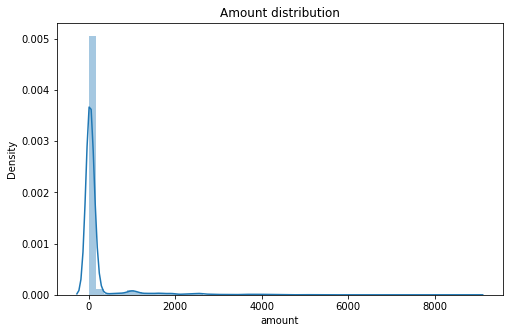

In [277]:
plt.figure(figsize = (8, 5))
sns.distplot(data.amount)
plt.title("Amount distribution")


# 4. Feature engineering

In this section, we are going to focus on dropping unwanted columns, deal with missing values and finally create some additional features that will make our data analysis more detailed and robust. 

## I. Drop unwanted columns

Drop currency and country columns as they do not provide any aditional information. 

In [278]:
print("Before: ", data.shape)
data = data.drop(["currency", "country"], axis = 1)
print("After: ", data.shape)


Before:  (12043, 23)
After:  (12043, 21)


## II. Deal with missing values

In [279]:
pd.DataFrame({"Number of missing values": missing, "Percentage": missing_percentage}).sort_values(by = "Percentage", ascending = False)

,Number of missing values,Percentage
bpay_biller_code,11158.0,92.7
merchant_code,11160.0,92.7
card_present_flag,NaN,35.9
merchant_id,NaN,35.9
merchant_long_lat,4326.0,35.9
merchant_state,NaN,35.9
merchant_suburb,NaN,35.9


Let's investigate if there is a reason behind these missing values. 

Recall that not all transactions are purchases-related, could this imply the missing values in the merchant columns?

In [280]:
nonSales = data.loc[(data.txn_description != "SALES-POS") | (data.txn_description != "POS"), :]
nonSales.isnull().sum().sort_values(ascending = False)

merchant_code        11160
bpay_biller_code     11158
merchant_suburb       4326
merchant_long_lat     4326
merchant_id           4326
card_present_flag     4326
merchant_state        4326
status                   0
customer_id              0
transaction_id           0
amount                   0
extraction               0
date                     0
age                      0
gender                   0
balance                  0
first_name               0
txn_description          0
long_lat                 0
account                  0
movement                 0
dtype: int64

As expected, missing values in the following columns all originate from non-purchases transactions:

- card_present_flag
- merchant_state
- merchant_suburb
- merchant_id
- merchant_long_lat

We will proceed to fill these missing values with n/a.

In [281]:
cols = ["card_present_flag", "merchant_state", "merchant_suburb", "merchant_id"]
for col in cols:
    data[col].fillna("n/a", inplace = True)

In [282]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending = False)

merchant_code        11160
bpay_biller_code     11158
merchant_long_lat     4326
dtype: int64

Both merchant_code and bpay_biller_code are severely missing, around 93%. Therefore, we will drop those 2 columns from the dataframe. 

In [283]:
data = data.drop(["merchant_code", "bpay_biller_code"], axis = 1)

## III. Create features for month, dayofweek and hour

In [284]:
daily_amount = pd.DataFrame(data.groupby("date").amount.sum())
daily_amount.head()

,amount
date,
2018-08-01,29867.94
2018-08-02,21786.32
2018-08-03,38096.58
2018-08-04,6296.05
2018-08-05,4426.50


Text(0, 0.5, 'Transaction volume')

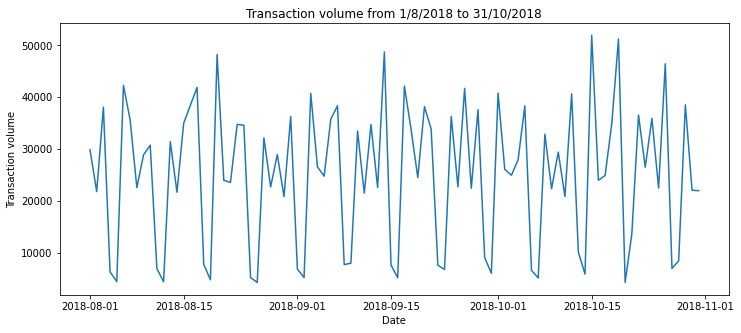

In [285]:
fig, ax = plt.subplots(figsize = (12, 5))
ax.plot(daily_amount.index, daily_amount.amount)
plt.title("Transaction volume from 1/8/2018 to 31/10/2018")
plt.xlabel("Date")
plt.ylabel("Transaction volume")

There appears to be a cyclical pattern in transaction volume over the 3 month period. My hypothesis for this occurence is:
- Salaries are paid out only on certain days of the week
- People tend to spend more during the weekends (shopping, going out with friends etc)

Therefore, to motivate this analysis, we will create 3 new features from both the date and extraction columns:
- month
- dayofweek
- hour

In [286]:
data["month"] = pd.DatetimeIndex(data.date).month
data["dayofweek"] = pd.DatetimeIndex(data.date).dayofweek
data[["date", "month", "dayofweek"]].head()

,date,month,dayofweek
0,2018-08-01,8,2
1,2018-08-01,8,2
2,2018-08-01,8,2
3,2018-08-01,8,2
4,2018-08-01,8,2


In addition to month and day of week, we can also get the hour in which those transactions took place from the extraction column.

First, I will update the extraction column such that it only contains the time. Then, I will create a new hour column which contains only the hour component of each transaction.

In [287]:
data.extraction.head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

In [288]:
data["extraction"] = [timestamp.split("T")[1].split(".")[0] for timestamp in data.extraction]
data.extraction.head()

0    01:01:15
1    01:13:45
2    01:26:15
3    01:38:45
4    01:51:15
Name: extraction, dtype: object

In [289]:
data["hour"] = [time.split(":")[0] for time in data.extraction]
data[["extraction", "hour"]].head()

,extraction,hour
0,01:01:15,01
1,01:13:45,01
2,01:26:15,01
3,01:38:45,01
4,01:51:15,01


In [290]:
print("Before: ", data.hour.dtype)
data["hour"] = pd.to_numeric(data.hour)
print("After: ", data.hour.dtype)

Before:  object
After:  int64


# 5. Deep dive 

Now that our dataframe is in a much better shape and we have new features to work with, let's now do a deep dive and see if we can gather any interesting insights about customers' transactional behaviour. 

In [291]:
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,month,dayofweek,hour
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,QLD,01:01:15,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,8,2,1
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,NSW,01:13:45,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,8,2,1
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,NSW,01:26:15,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,8,2,1
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,QLD,01:38:45,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,8,2,1
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,QLD,01:51:15,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,8,2,1


## I. Purchases amount and overall amount

In [292]:
purchases_amount = data.loc[(data.txn_description == "POS") | (data.txn_description == "SALES-POS"), "amount"]
purchases_amount.head()

0    16.25
1    14.19
2     6.42
3    40.90
4     3.25
Name: amount, dtype: float64

/home/ayodeji/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Purchase transaction amount')

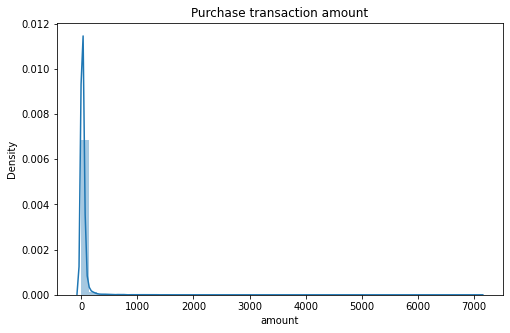

In [293]:
plt.figure(figsize = (8, 5))
sns.distplot(purchases_amount)
plt.title("Purchase transaction amount")

In [294]:
purchases_amount.describe()

count    7717.000000
mean       40.153732
std       149.833070
min         0.100000
25%        12.080000
50%        19.700000
75%        33.910000
max      7081.090000
Name: amount, dtype: float64

/home/ayodeji/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Overall transaction amount')

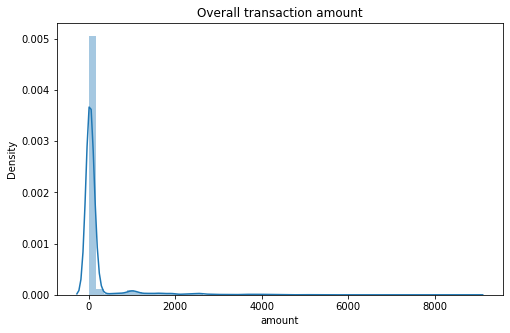

In [295]:
plt.figure(figsize = (8, 5))
sns.distplot(data.amount)
plt.title("Overall transaction amount")

In [296]:
data.amount.describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

Variance in overall transaction amount is much higher than purchases transaction amount due to the inclusion of salary payments. 

## II. Transaction volume per customer

In [297]:
customer_monthly_volume = pd.DataFrame(data.groupby("customer_id").amount.sum() / 3) 
customer_monthly_volume.head()

,amount
customer_id,
CUS-1005756958,5422.990000
CUS-1117979751,11328.123333
CUS-1140341822,5670.200000
CUS-1147642491,9660.273333
CUS-1196156254,12016.906667


/home/ayodeji/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Customers' monthly transaction volume")

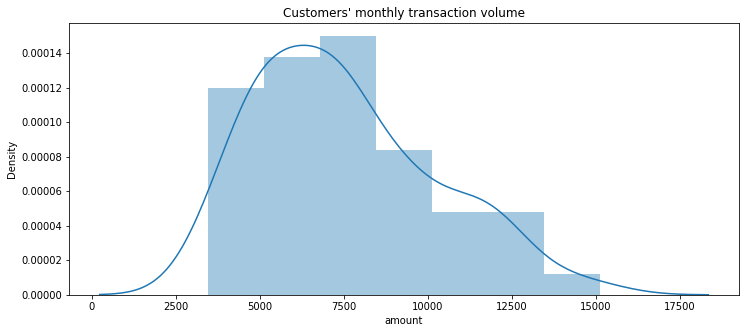

In [298]:
plt.figure(figsize = (12, 5))
sns.distplot(customer_monthly_volume.amount)
plt.title("Customers' monthly transaction volume")

## III. Transaction volume over time

Text(0.5, 1.0, 'Average transaction volume by month')

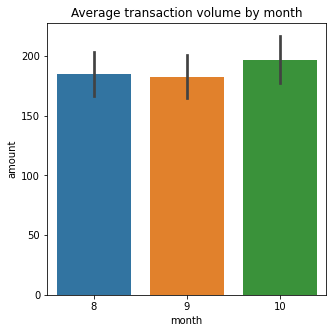

In [299]:
plt.figure(figsize = (5, 5))
sns.barplot(x = "month", y = "amount", data = data)
plt.title("Average transaction volume by month")

In [300]:
average_daily_volume = pd.DataFrame(data.groupby("dayofweek").amount.mean())
average_daily_volume.head()

,amount
dayofweek,
0,373.221000
1,221.576456
2,195.215570
3,184.010422
4,249.353517


Text(0.5, 0, 'Day of week')

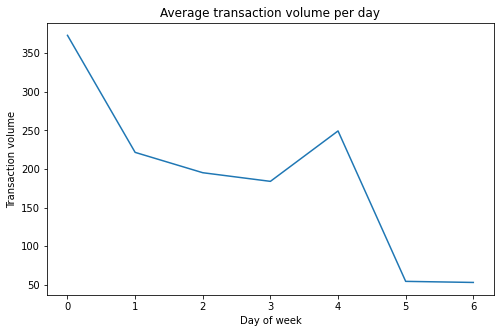

In [301]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(average_daily_volume.index, average_daily_volume.amount)
plt.title("Average transaction volume per day")
plt.ylabel("Transaction volume")
plt.xlabel("Day of week")

Friday and Saturday have the lowest average transaction volume. Let's see a breakdown of these transactions by types of transactions. 

To simplify the categories, I will group all transactions into 3 categories:
- Salary
- Purchase
- Others

In [302]:
data.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [303]:
data.loc[data.txn_description == "PAY/SALARY", "category"] = "Salary"
data.loc[(data.txn_description == "SALES-POS") | (data.txn_description == "POS"), "category"] = "Purchase"
data.category.fillna("Others", inplace = True)
data[["txn_description", "category"]].head(10)

,txn_description,category
0,POS,Purchase
1,SALES-POS,Purchase
2,POS,Purchase
3,SALES-POS,Purchase
4,SALES-POS,Purchase
5,PAYMENT,Others
6,SALES-POS,Purchase
7,POS,Purchase
8,POS,Purchase
9,INTER BANK,Others


Text(0.5, 0, 'Day of week')

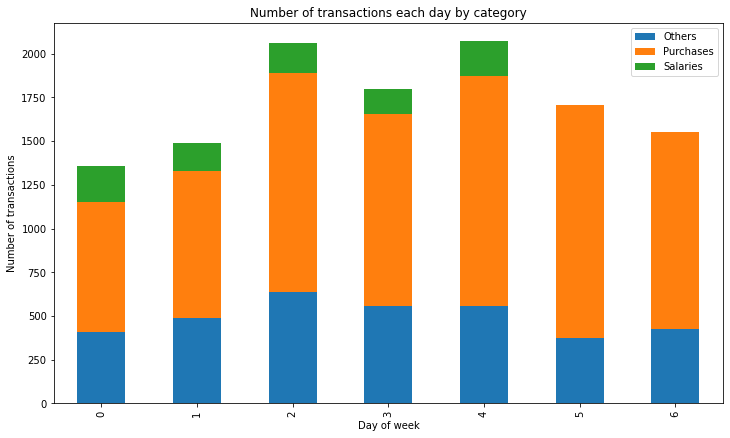

In [304]:
stacked_barplot = pd.DataFrame(data.groupby(["dayofweek", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (12, 7))
plt.title("Number of transactions each day by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.ylabel("Number of transactions")
plt.xlabel("Day of week")

No salaries were paid on Friday and Saturday, therefore lower average transaction volume on those days.

Also, it does not seem to appear that people spend more on purchases over the weekends. 

In [305]:
average_hourly_volume = pd.DataFrame(data.groupby("hour").amount.mean())
average_hourly_volume.head()

,amount
hour,
0,28.274907
1,48.716402
2,75.269764
3,84.725918
4,61.301845


Text(0.5, 0, 'Hour')

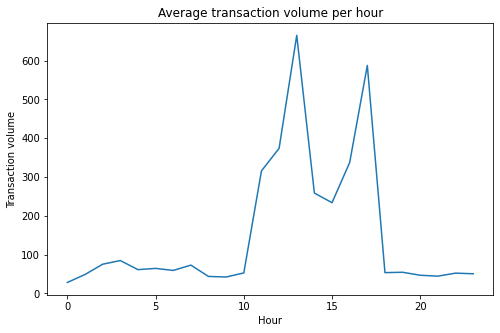

In [306]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(average_hourly_volume.index, average_hourly_volume.amount)
plt.title("Average transaction volume per hour")
plt.ylabel("Transaction volume")
plt.xlabel("Hour")

Highest transaction volumes happen during the midday and late afternoon. Let's see a breakdown of these transactions by categories. 

Text(0.5, 0, 'Hour')

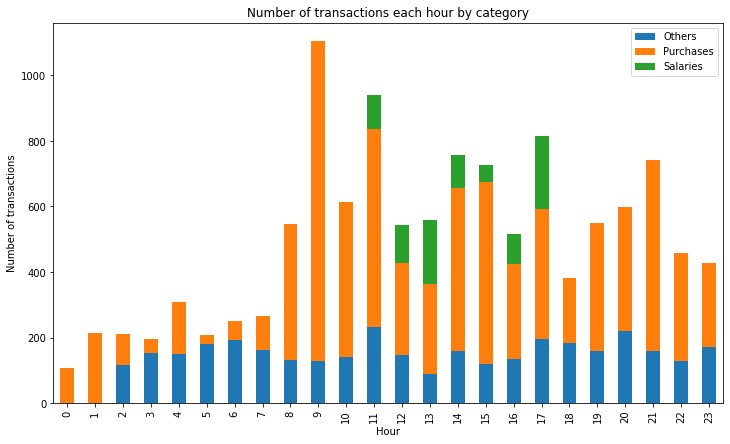

In [307]:
stacked_barplot = pd.DataFrame(data.groupby(["hour", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (12, 7))
plt.title("Number of transactions each hour by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.ylabel("Number of transactions")
plt.xlabel("Hour")

## IV. Distance between customers and merchants 

An additional challenge that we could do is figuring out the distance between the customers and the merchants and analyse its distribution.

In [308]:
data[["long_lat", "merchant_long_lat"]].head()

,long_lat,merchant_long_lat
0,153.41 -27.95,153.38 -27.99
1,153.41 -27.95,151.21 -33.87
2,151.23 -33.94,151.21 -33.87
3,153.10 -27.66,153.05 -26.68
4,153.41 -27.95,153.44 -28.06


In [323]:
data['longitude'] = [longitude.split('-')[0] for longitude in data.long_lat]
data['latitude'] =  [latitude.split('-')[1] for latitude in data.long_lat]
data[['longitude', 'latitude']].head()

,longitude,latitude
0,153.41,27.95
1,153.41,27.95
2,151.23,33.94
3,153.10,27.66
4,153.41,27.95


In [324]:
data["longitude"] = pd.to_numeric(data.longitude)
data["latitude"] = pd.to_numeric(data.latitude)

# 6. Save data

In [325]:
data.to_pickle('/home/ayodeji/Downloads/Documents/DATA @ ANZ/data.pkl')